# Introduction
In this notebook, we will try to comprehend the business problem to better understand the data - getting know each other 😏

# Goals

* Explore the data, figure out if there is a pattern, bias, noise, imbalance, etc.
* Do some exploratory summary statistics 
* Figure out a way to deal with such a huge feature space to be able to talk to the data.
* Do exhaustive exploratory data analysis using communacative visualization
* Create a to-do list of the mandatory preprocessing steps for data cleaning
* Start preprocessing 
* Feature engineering
* Model building
* gauge performance

# Updates

> **01/28/2021**: 
    - Update seaborn to v0.11 
    - Restructure the Notebook, hide code, ignore warnings
    - Drop unnecessay columns in train dataset
    - Numerical data visualization



In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # visualization
!pip install seaborn as sns -q # visualization with seaborn v0.11.1
import seaborn as sns # visualization
import missingno as msno # missing values pattern visualization

import warnings # supress warnings
warnings.filterwarnings('ignore')

# set pandas display option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the data 
train_df = pd.read_csv('../input/widsdatathon2021/TrainingWiDS2021.csv')
test_df = pd.read_csv('../input/widsdatathon2021/UnlabeledWiDS2021.csv')
data_dictionary_df = pd.read_csv("../input/widsdatathon2021/DataDictionaryWiDS2021.csv")

# Drop first column because it is identical to index
train_df.drop("Unnamed: 0", axis = 1, inplace = True)
test_df.drop("Unnamed: 0", axis = 1, inplace = True)

# display the dataset
train_df.head().style.set_caption('Sample of training data')

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.000000,22.732803,0,Caucasian,M,180.300000,Floor,Floor,92,admit,CTICU,0.541667,0,73.900000,2.300000,113.000000,502.010000,0,0,0.400000,31.000000,2.510000,nan,3.000000,6.000000,0.000000,4.000000,168.000000,118.000000,27.400000,0,40.000000,nan,nan,nan,nan,36.000000,134.000000,39.300000,nan,0,14.100000,46.000000,32.000000,68.000000,37.000000,68.000000,37.000000,119.000000,72.000000,66.000000,40.000000,89.000000,46.000000,89.000000,46.000000,34.000000,10.000000,100.000000,74.000000,122.000000,64.000000,131.000000,73.000000,131.000000,73.000000,39.900000,37.200000,nan,nan,68.000000,63.000000,68.000000,63.000000,119.000000,108.000000,nan,nan,86.000000,85.000000,86.000000,85.000000,26.000000,18.000000,100.000000,74.000000,nan,nan,131.000000,115.000000,131.000000,115.000000,39.500000,37.500000,2.300000,2.300000,0.400000,0.400000,31.000000,30.000000,8.500000,7.400000,2.510000,2.230000,168.000000,109.000000,19.000000,15.000000,8.900000,8.900000,27.400000,27.400000,nan,nan,1.300000,1.000000,233.000000,233.000000,4.000000,3.400000,136.000000,134.000000,14.100000,14.100000,nan,nan,nan,na

In [31]:
sns.__version__

'0.11.1'

# Summarize the dataset

In [32]:
# dimension of the dataset
print(f'Train_df shape is: {train_df.shape}')

Train_df shape is: (130157, 180)


In [33]:
# dimension of the dataset
print(f'Test_df shape is: {test_df.shape}')

Test_df shape is: (10234, 179)


We have 130,157 observations with 181 features including target variable `diabetes_mellitus`

In [34]:
# peek at the dataset
# percentile list 
perc =[.20, .40, .60, .80] 
  
# list of dtypes to include 
include =['object', 'float', 'int'] 
train_df.describe(percentiles = perc, include = include)
# print(f'Train_df statistical summary: \n{train_df.describe(percentiles = perc, include = include)}')

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,130157.000000,130157.000000,125169.000000,125667.000000,130157.000000,128570,130091,128080.000000,96959,129917,130157.000000,130157,130157,130157.000000,130157.0,126694.000000,51994.000000,128472.000000,129292.000000,130157.000000,130157.000000,47597.000000,104746.000000,105275.000000,30437.000000,127967.000000,127967.000000,129448.000000,127967.000000,115461.000000,129848.000000,103399.000000,130157.000000,129737.000000,30437.000000,30437.000000,30437.000000,30437.000000,129349.000000,105638.00000,123546.000000,66990.000000,130157.000000,100682.000000,35089.000000,35089.000000,129880.000000,129880.000000,128521.000000,128521.000000,129895.000000,129895.000000,35289.000000,35289.000000,129830.000000,129830.000000,127929.000000,127929.000000,129474.000000,129474.000000,129625.000000,129625.000000,35119.000000,35119.000000,129886.000000,129886.000000,128534.000000,128534.000000,125663.000000,125663.000000,25328.000000,25328.000000,124630.000000,124630.000000,118818.000000,118818.000000,126083.000000,126083.000000,25391.000000,25391.000000,123627.000000,123627.000000,116860.000000,11686

In [35]:
print({train_df.info(verbose = True, null_counts = True)})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130157 entries, 0 to 130156
Data columns (total 180 columns):
 #    Column                       Non-Null Count   Dtype  
---   ------                       --------------   -----  
 0    encounter_id                 130157 non-null  int64  
 1    hospital_id                  130157 non-null  int64  
 2    age                          125169 non-null  float64
 3    bmi                          125667 non-null  float64
 4    elective_surgery             130157 non-null  int64  
 5    ethnicity                    128570 non-null  object 
 6    gender                       130091 non-null  object 
 7    height                       128080 non-null  float64
 8    hospital_admit_source        96959 non-null   object 
 9    icu_admit_source             129917 non-null  object 
 10   icu_id                       130157 non-null  int64  
 11   icu_stay_type                130157 non-null  object 
 12   icu_type                     130157 non-nu

In [36]:
# let's check the class distribution
print(f'Class distribution in train_df: \n{train_df.groupby("diabetes_mellitus").size()}')

Class distribution in train_df: 
diabetes_mellitus
0    102006
1     28151
dtype: int64


It is obvious that there is an imbalance in the target class with about 78.3% biased to people who are free of diabetes 

In [37]:
# investigating missing values per column sorted in Desc order in %
round(train_df.isnull().mean().mul(100).sort_values(ascending = False), 2)

h1_bilirubin_max               92.09
h1_bilirubin_min               92.09
h1_albumin_max                 91.43
h1_albumin_min                 91.43
h1_lactate_max                 91.02
h1_lactate_min                 91.02
h1_pao2fio2ratio_min           87.12
h1_pao2fio2ratio_max           87.12
h1_arterial_ph_max             82.86
h1_arterial_ph_min             82.86
h1_arterial_pco2_min           82.72
h1_arterial_pco2_max           82.72
h1_arterial_po2_max            82.55
h1_arterial_po2_min            82.55
h1_hco3_max                    81.74
h1_hco3_min                    81.74
h1_wbc_max                     81.43
h1_wbc_min                     81.43
h1_calcium_min                 81.38
h1_calcium_max                 81.38
h1_platelets_min               81.23
h1_platelets_max               81.23
h1_bun_max                     80.66
h1_bun_min                     80.66
h1_diasbp_invasive_min         80.54
h1_diasbp_invasive_max         80.54
h1_sysbp_invasive_min          80.52
h

In [38]:
# set a treshhold - only trues should be either imputed or dropped -> will investigate more in EDA
treshold = 30
(train_df.isnull().sum().sort_values()/len(train_df) * 100) < treshold

encounter_id                    True
lymphoma                        True
leukemia                        True
immunosuppression               True
hepatic_failure                 True
cirrhosis                       True
aids                            True
solid_tumor_with_metastasis     True
ventilated_apache               True
intubated_apache                True
arf_apache                      True
apache_post_operative           True
readmission_status              True
diabetes_mellitus               True
icu_type                        True
pre_icu_los_days                True
hospital_id                     True
elective_surgery                True
icu_stay_type                   True
icu_id                          True
gender                          True
icu_admit_source                True
d1_heartrate_min                True
d1_heartrate_max                True
d1_sysbp_max                    True
d1_sysbp_min                    True
d1_diasbp_min                   True
d

Investigating what type of missing values are 

* Missing Values
* % of Total Values
* Data Type

In [39]:

def missing_zero_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = round(df.isnull().mean().mul(100), 2)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {df.index.name:'col_name', 0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data_type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0 ].sort_values(
        '% of Total Values', ascending=False)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table.reset_index()

In [40]:
missing = missing_zero_values_table(train_df)
missing[:20].style.background_gradient(cmap='Reds')

Your selected dataframe has 180 columns and 130157 Rows.
There are 160 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,h1_bilirubin_min,119861,92.090000,float64
1,h1_bilirubin_max,119861,92.090000,float64
2,h1_albumin_max,119005,91.430000,float64
3,h1_albumin_min,119005,91.430000,float64
4,h1_lactate_max,118467,91.020000,float64
5,h1_lactate_min,118467,91.020000,float64
6,h1_pao2fio2ratio_min,113397,87.120000,float64
7,h1_pao2fio2ratio_max,113397,87.120000,float64
8,h1_arterial_ph_max,107849,82.860000,float64
9,h1_arterial_ph_min,107849,82.860000,float64


Check the test data missing values


In [41]:
missing_test = missing_zero_values_table(test_df)

missing_test[:20].style.background_gradient(cmap='Greens')

Your selected dataframe has 179 columns and 10234 Rows.
There are 159 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,h1_lactate_min,9421,92.060000,float64
1,h1_lactate_max,9421,92.060000,float64
2,h1_bilirubin_min,9407,91.920000,float64
3,h1_bilirubin_max,9407,91.920000,float64
4,h1_albumin_max,9365,91.510000,float64
5,h1_albumin_min,9365,91.510000,float64
6,h1_pao2fio2ratio_min,8812,86.110000,float64
7,h1_pao2fio2ratio_max,8812,86.110000,float64
8,h1_arterial_ph_min,8401,82.090000,float64
9,h1_arterial_ph_max,8401,82.090000,float64


In [42]:
# Investigate categorical variables and how many levels each one has in one bug dictionary
temp = {str(k): list(v) for k, v in train_df.groupby(train_df.dtypes, axis=1)}


We can see here that the target variable is presented as an `int64` not object representation!!

Check for rare labels, how many subcategories per each categorical variable. This would help when feature engineering to reduce the feature space to include important features only that would make the final model more robust. Eliminating rare labels, if doesn't have effect on the target variable, would ultimately enhance the predictive power. 

In [43]:
for c in train_df:
    if train_df[c].dtypes == 'object':
        print(f'{c} has {train_df[c].unique()} \n')
        print(f'{train_df[c].value_counts()} \n')
        print(f'Missing count: {train_df[c].isnull().sum()}')
        print('================')

ethnicity has ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown'] 

Caucasian           100236
African American     13911
Other/Unknown         6261
Hispanic              5049
Asian                 2198
Native American        915
Name: ethnicity, dtype: int64 

Missing count: 1587
gender has ['M' 'F' nan] 

M    70518
F    59573
Name: gender, dtype: int64 

Missing count: 66
hospital_admit_source has ['Floor' 'Emergency Department' 'Operating Room' nan 'Direct Admit'
 'Other Hospital' 'Other ICU' 'ICU to SDU' 'Recovery Room'
 'Chest Pain Center' 'Step-Down Unit (SDU)' 'Acute Care/Floor' 'PACU'
 'Observation' 'ICU' 'Other'] 

Emergency Department    51258
Operating Room          13757
Floor                   11324
Direct Admit             8253
Recovery Room            4563
Other Hospital           2417
Acute Care/Floor         2097
Step-Down Unit (SDU)     1607
PACU                     1031
Other ICU                 283
Chest Pain Center         25

Check the variables skewness and sort them in a Desc order. 

In [44]:
def skew_test(df):
    col = df.skew(axis = 0, skipna = True)
    val = df.skew(axis = 0, skipna = True) 
    sk_table = pd.concat([col, val], axis = 1)
    sk_table = sk_table.rename(
    columns = {0 : 'skewness'})
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
        "There are " + str(sk_table.shape[0]) +
          " columns that have skewed values - Non Gaussian distribution.")
    return sk_table.drop([1], axis = 1).sort_values('skewness',ascending = False).reset_index()



In [45]:
skk = skew_test(train_df)
skk[:20].style.background_gradient(cmap='Blues')

Your selected dataframe has 180 columns and 130157 Rows.
There are 174 columns that have skewed values - Non Gaussian distribution.


,index,skewness
0,aids,31.118230
1,lymphoma,15.356752
2,pre_icu_los_days,12.665102
3,leukemia,11.570382
4,gcs_unable_apache,9.188000
5,d1_bilirubin_min,8.908617
6,h1_bilirubin_min,8.841709
7,h1_bilirubin_max,8.837047
8,d1_bilirubin_max,8.653272
9,bilirubin_apache,8.611120


<hr>

# Visualization
For this section, we would infer more insights from the data to get a more clear idea of the business problem. We will start by univariate visualation per feature - starting with categorical variables. After that, will investigate more using bivariate analysis, finally multivariate analysis to figure out the relations between features and target variable. 

# Univariate Analysis
We will start with some univariate plots, that is, plots of each individual variable. Given that
the input variables are numeric, we can create box and whisker plots of each.

In [46]:
# Use plotly to plot interactive bar chart
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x = train_df['diabetes_mellitus'].value_counts().index, y = train_df['diabetes_mellitus'].value_counts())])
fig.update_traces(marker_color = 'rgb(0,200,0)', marker_line_color = 'rgb(0,255,0)',
                  marker_line_width = 7, opacity = 0.6)
fig.show()

The target variable seems to have imbalance class! we may consider resampling procedure later🤔

# Visualize categorical variable
For simplicity, I will partitioning the train dataset into sub dataframes. 
* target_df: a dataframe that contains only target variable
* cat_train: which contains the categorical data with the target_df
* num_train: contains numerical variables that related to patient characteristics
* prexist_train: contains variables related to if the patient has pre-existing conditions
* measure_train: contains the rest of the variables in the dataset.


In [47]:
target_df = train_df[['diabetes_mellitus']]
target_df.shape

(130157, 1)

In [48]:
cat_pred_df = train_df.select_dtypes('object')
cat_train = pd.concat([cat_pred_df, target_df], axis = 1)
cat_train.head().style.set_caption('Sample of training data for only categorical data')

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,diabetes_mellitus
0,Caucasian,M,Floor,Floor,admit,CTICU,1
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,1
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,0
3,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,0
4,Caucasian,M,nan,Accident & Emergency,admit,Med-Surg ICU,0


Getting more insights about each category sub categories

In [49]:
# Number of unique classes in each object column
cat_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

ethnicity                 6
gender                    2
hospital_admit_source    15
icu_admit_source          5
icu_stay_type             3
icu_type                  8
dtype: int64

Exploring each category distribution with regards to the target variable

In [50]:
# function to plot the count of each variable

def count_plot(df, x_lab, hu):
    sns.set_style('white')
    sns.set_palette('Set1', 8, .75)
    g = sns.factorplot(x = x_lab, hue = hu, data = df[df[x_lab].notnull()], kind = 'count')
    g.set_xticklabels(rotation=90)
    g.fig.suptitle(f'{x_lab} count plot')
    g.fig.set_size_inches(10, 7)
    

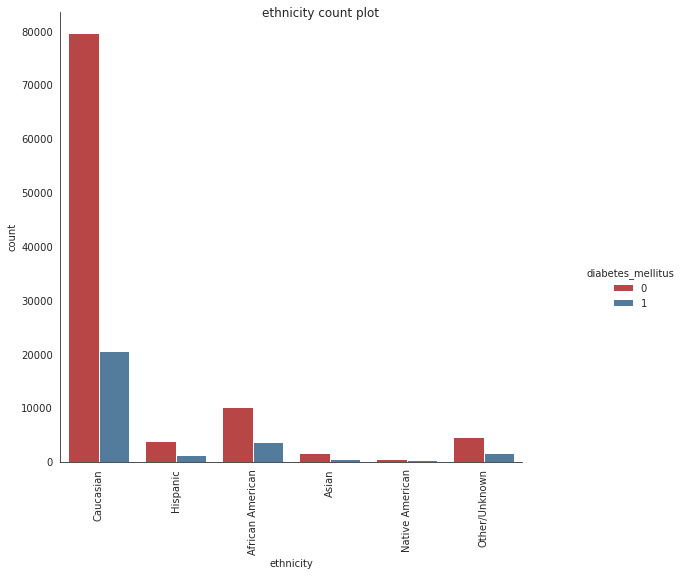

In [51]:
count_plot(df = cat_train, x_lab = 'ethnicity', hu = 'diabetes_mellitus')

Caucasians seems to have the majority amonge other ethnicities who admit to the hospital. On the other hand, Native American and Asians who admitted to the hospital less than 10,000. 

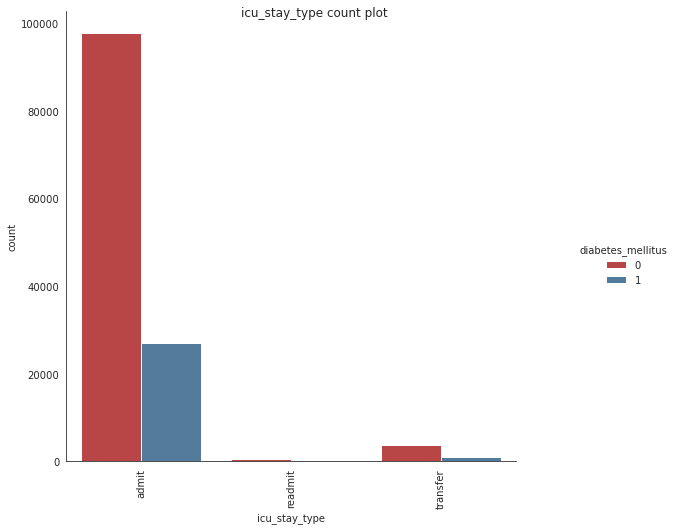

In [52]:
count_plot(df = cat_train, x_lab = 'icu_stay_type', hu = 'diabetes_mellitus')

It seems that both icu_stay_type and transfer may be considered as rare labels when we come to the data processing step. 

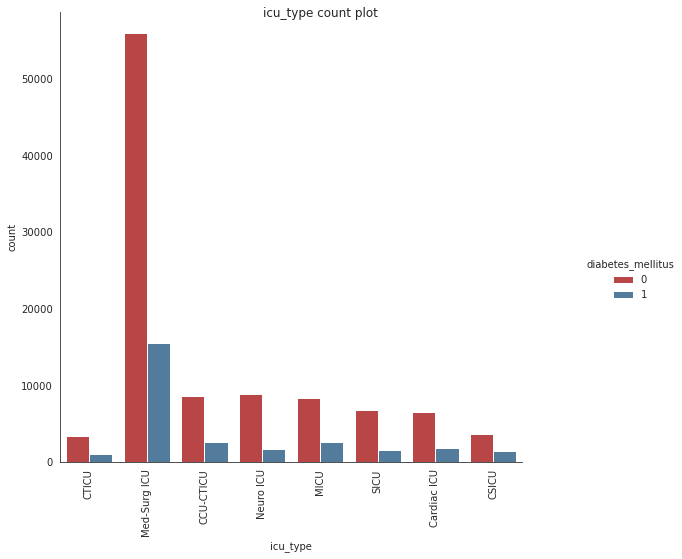

In [53]:
count_plot(df = cat_train, x_lab = 'icu_type', hu = 'diabetes_mellitus')

In [54]:
# function to plot the count of each category subcategories 
def cat_plot(df, x_lab, hu, col, asp):
    sns.set_style('white')
    sns.set_palette('Set1', 8, .75)
    t = sns.catplot(x = x_lab, hue = hu, col = col, 
                data = df, kind = 'count', height = 6, aspect = asp)
    t.set_xticklabels(rotation=90)


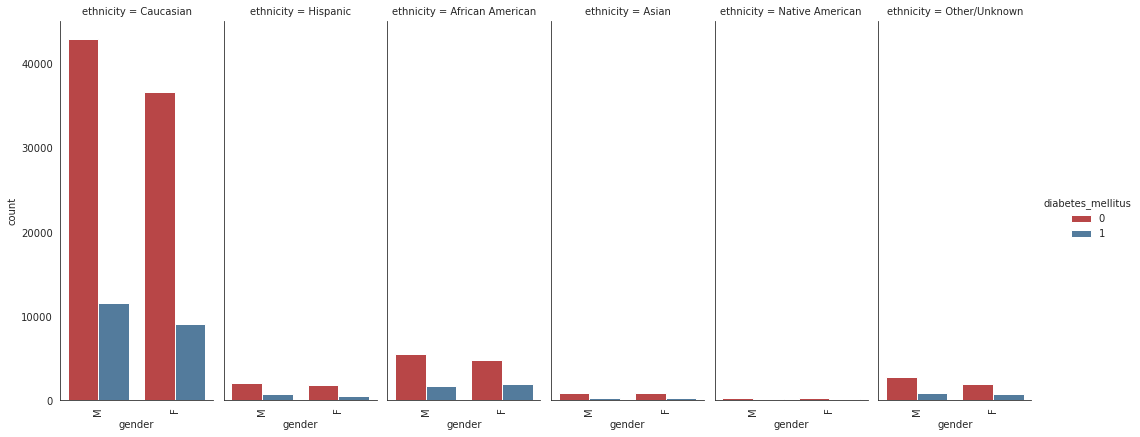

In [55]:
cat_plot(df = cat_train, x_lab = 'gender', hu = 'diabetes_mellitus', col = 'ethnicity', asp = 0.4)

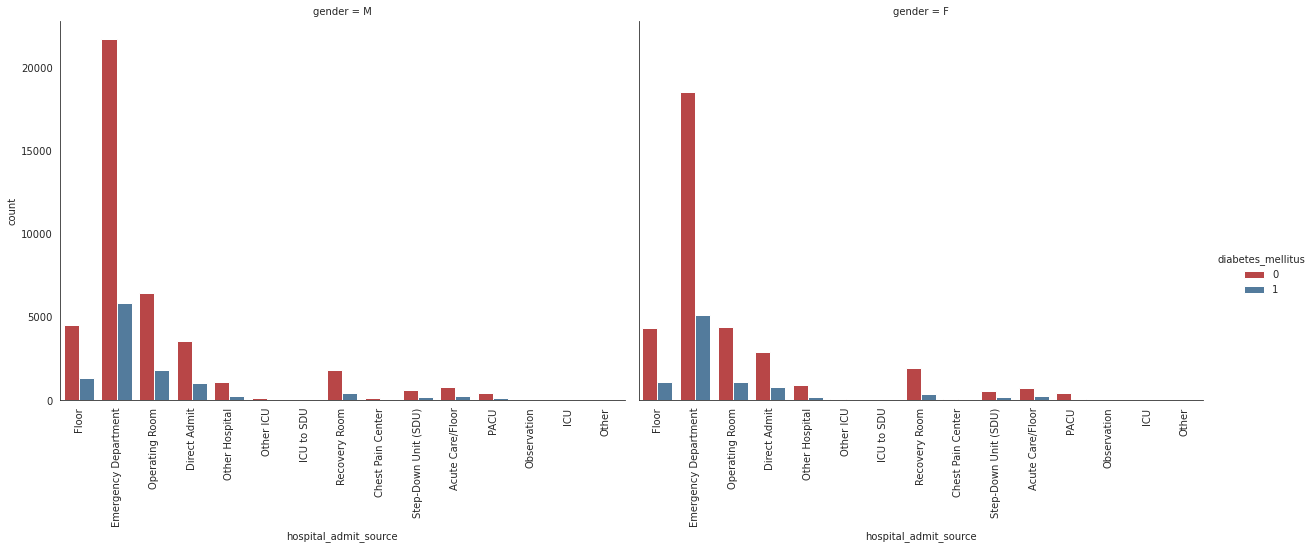

In [56]:
cat_plot(df = cat_train, x_lab = 'hospital_admit_source', hu = 'diabetes_mellitus', col = 'gender', asp = 1.4)

Majority of cases came from ER department

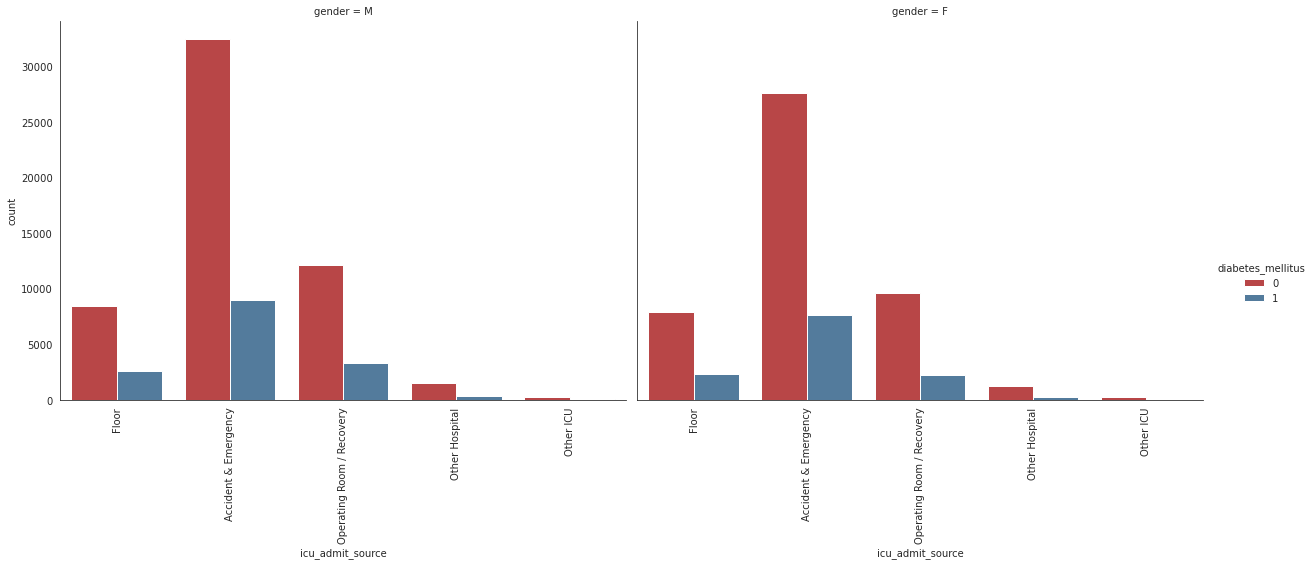

In [57]:
cat_plot(df = cat_train, x_lab = 'icu_admit_source', hu = 'diabetes_mellitus', col = 'gender', asp = 1.4)

Your selected dataframe has 7 columns and 130157 Rows.
There are 4 columns that have missing values.


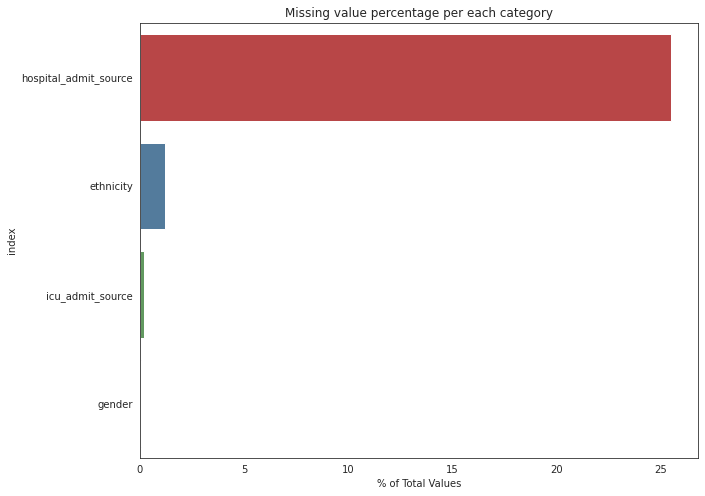

In [59]:
# let's check the missing patterns
cat_missing = missing_zero_values_table(cat_train)
cat_missing.head()
plt.figure(figsize=(10, 8))
plt.title('Missing value percentage per each category')
sns.diverging_palette(240, 10, n=5)
s = sns.barplot(x = '% of Total Values', y = 'index', data = cat_missing)

It seems that `hospital_admit_source` would require attention to either impute or drop, will findout later!

## Missing values patterns

Let's find out if there is a pattern in the missing datapoints within the categorical variables

<AxesSubplot:>

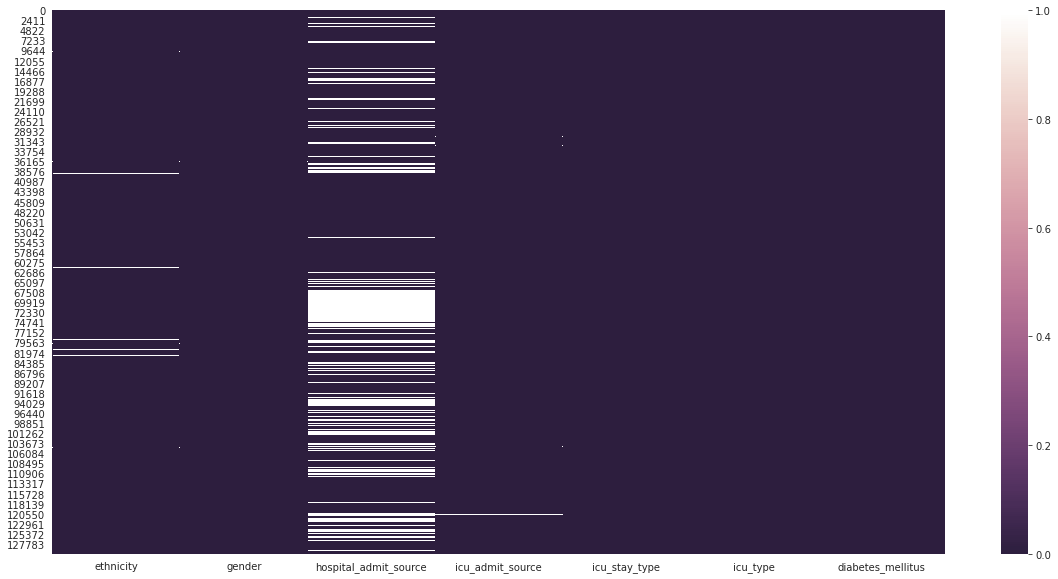

In [60]:
plt.figure(figsize=(20, 10))

# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(cat_train.isnull(), cmap=cmap)

<AxesSubplot:>

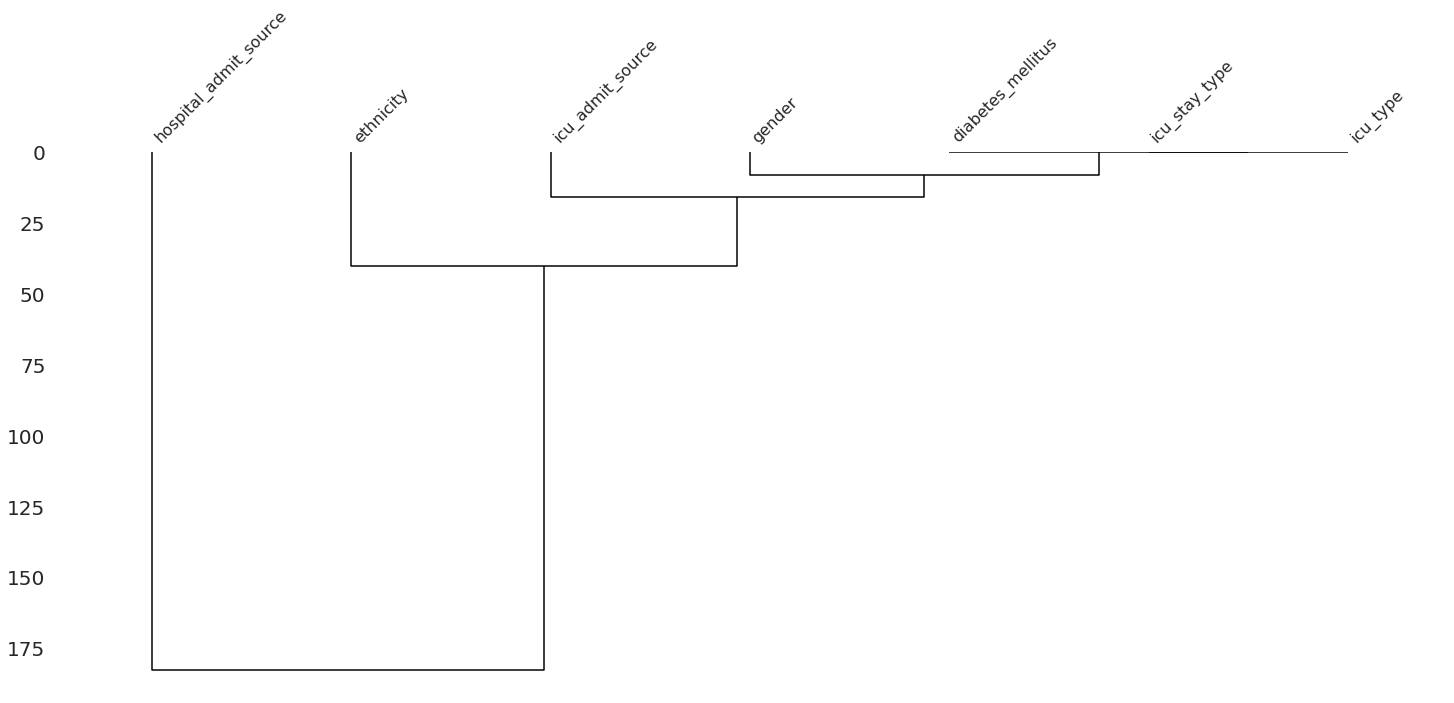

In [61]:
msno.dendrogram(cat_train)

## Results - Categorical variables

It seems that `hospital_admit_source` could be dropped in the preprocess step as from the dendrogram, there is a big difference in the cluster of missing values between target variable `diabetes_mellitus` and the `hospital_admit_source` variable. However, the `icu_admit_source` seems much closer to the target variable - has a shorter tree. 

For the rest of the variables, we need to include into the model. However, we need to impute some of the variables. Also, we may consider to remove rare-labels like the `icu_admit_source` to reduce noise and feature space. 

<hr>

# Numeric variables


In [62]:
# take a subset of patient characteristic 
num_pred_df = train_df.iloc[:, 0:45]
# concat the target variable target_df
num_train = pd.concat([num_pred_df, target_df], axis = 1)
# we may drop the unnecessary column which is encounter_id, hospital_id, 
num_train.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,1
2,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,0,NaN,NaN,0
3,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.39,4.0,NaN,34.8,NaN,1,8.0,62.0,0
4,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,36.7,NaN,0,NaN,NaN,0


In [63]:
num_train.shape

(130157, 46)

Let's explore the distribution per variable.

We need first to drop constants from the dataset to reduce complexity space. 

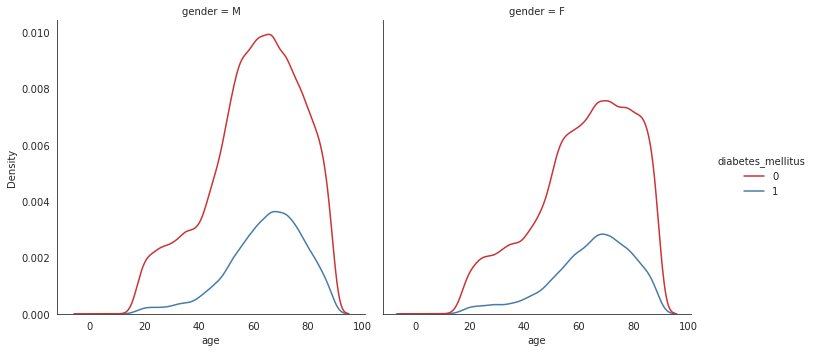

In [64]:
sns.displot(data=num_train, x="age", hue="diabetes_mellitus", col="gender", kind="kde")

In [65]:
def drop_constant_columns(df):
    """
    Drops constant value columns of pandas dataframe.
    """
    keep_columns = df.columns[df.nunique() > 1]
    return df.loc[:,keep_columns].copy()

In [66]:
len(num_train.columns[num_train.nunique()>2])

37

In [67]:
vars_only = drop_constant_columns(num_train)
vars_only.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,1
2,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,95.3,NaN,122.0,703.03,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,0,NaN,NaN,0
3,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,61.7,NaN,203.0,1206.03,1,0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.39,4.0,NaN,34.8,NaN,1,8.0,62.0,0
4,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,NaN,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,36.7,NaN,0,NaN,NaN,0


In [91]:
num_train.shape

(130157, 46)

Define a function to remove constants from the `num_train` with a threshold of 0.1 removes constants like ids for example. 

In [86]:
# filter out constants and quazi constants
from sklearn.feature_selection import VarianceThreshold
# treshold = 0 -> constant
# treshold = 0.01 -> quasiconstant 

def variance_threshold_selector(df, threshold=0):
    data = df.select_dtypes([np.int, np.float])
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [114]:
# df = num_train.select_dtypes([np.int, np.float])
# df.head()
san_const = variance_threshold_selector(num_train, 0.1)
san_const.columns

Index(['encounter_id', 'hospital_id', 'age', 'bmi', 'elective_surgery',
       'height', 'icu_id', 'pre_icu_los_days', 'weight', 'albumin_apache',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'bilirubin_apache', 'bun_apache', 'creatinine_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'glucose_apache', 'heart_rate_apache', 'hematocrit_apache',
       'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache',
       'pao2_apache', 'resprate_apache', 'sodium_apache', 'temp_apache',
       'urineoutput_apache', 'ventilated_apache', 'wbc_apache',
       'd1_diasbp_invasive_max', 'diabetes_mellitus'],
      dtype='object')

In [96]:
# remove quasi constants 
# san_const = variance_threshold_selector(san_const, 0.01)

After removing the constant variables, I will drop the columns with id as is doesn't infer any insights out of the data. 

In [ ]:

#  drop ids columns 
df1 = san_const.drop(columns = ['encounter_id', 'hospital_id'])

#  plot Numerical Data
a = 15  # number of rows
b = 3  # number of columns

fig = plt.figure(figsize=(12,25))

for i , col in enumerate(df1.columns, 1):
    plt.subplot(a, b, i)
    plt.title(f'{col} histplot')
    sns.histplot(x = df1[col])

plt.tight_layout()
plt.show()
    

KeyboardInterrupt: 

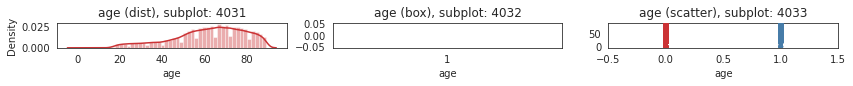

In [146]:
# #  plot Numerical Data
# a = 40  # number of rows
# b = 3  # number of columns
# c = 1  # initialize plot counter

# # diabetes_num = list(san_const.drop(columns = ['encounter_id', 'hospital_id']).columns)

# fig = plt.figure(figsize=(14,22))

# for i in diabetes_num:
#     plt.subplot(a, b, c)
#     plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
#     plt.xlabel(i)
#     sns.distplot(df1[i])
#     c = c + 1

#     plt.subplot(a, b, c)
#     plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
#     plt.xlabel(i)
#     plt.boxplot(x = df1[i])
#     c = c + 1

#     plt.subplot(a, b, c)
#     plt.title('{} (scatter), subplot: {}{}{}'.format(i, a, b, c))
#     plt.xlabel(i)
#     sns.swarmplot(data = df1, x = 'diabetes_mellitus', y = df1[i])
#     c = c + 1

# plt.show()